In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [94]:
df=pd.read_csv("Heart-Disease.csv")
df.columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [95]:
#checking the datatype of each column 
print(df.dtypes)
# All features are of integer except Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime which are object
print(df.info())

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  num       3

# # Attribute Information
1-age: age in years


2- sex: sex (1 = male; 0 = female)

3- cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic


4- trestbps: resting blood pressure (in mm Hg on admission to the hospital)


5- chol: serum cholestoral in mg/dl

6- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7- restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8- thalach: maximum heart rate achieved

9- exang: exercise induced angina (1 = yes; 0 = no)

10- oldpeak = ST depression induced by exercise relative to rest

11- slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

12- ca: number of major vessels (0-3) colored by flourosopy

13- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

18- num(TARGET): diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels



In [97]:
df.shape

(302, 14)

In [98]:
df1=df.replace("?","0")

In [99]:
df1.shape

(302, 14)

In [100]:
#Using Label Encoder to convert all object type data into integer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['ca','thal']
for i in list1:
    df1[i]=le.fit_transform(df1[i].astype(str))

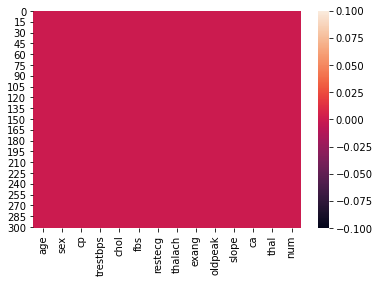

In [101]:
#checking null values using heat map
sns.heatmap(df1.isnull())
#we can see that their is no null values

In [102]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9A35EEC40>,
      dtype=object)

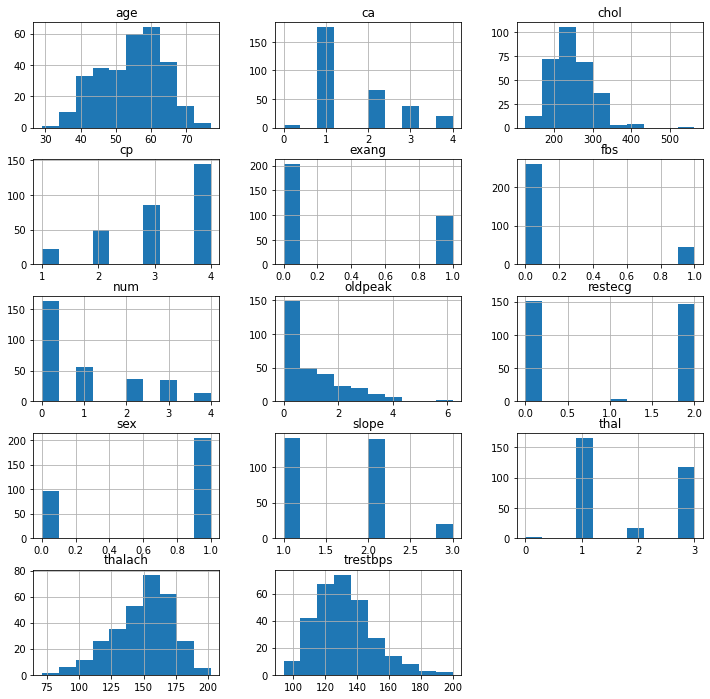

In [103]:
df1.hist(figsize=(12,12),layout=(5,3))

age            AxesSubplot(0.125,0.749828;0.227941x0.130172)
sex         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
cp          AxesSubplot(0.672059,0.749828;0.227941x0.130172)
trestbps       AxesSubplot(0.125,0.593621;0.227941x0.130172)
chol        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
fbs         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
restecg        AxesSubplot(0.125,0.437414;0.227941x0.130172)
thalach     AxesSubplot(0.398529,0.437414;0.227941x0.130172)
exang       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
oldpeak        AxesSubplot(0.125,0.281207;0.227941x0.130172)
slope       AxesSubplot(0.398529,0.281207;0.227941x0.130172)
num         AxesSubplot(0.672059,0.281207;0.227941x0.130172)
dtype: object

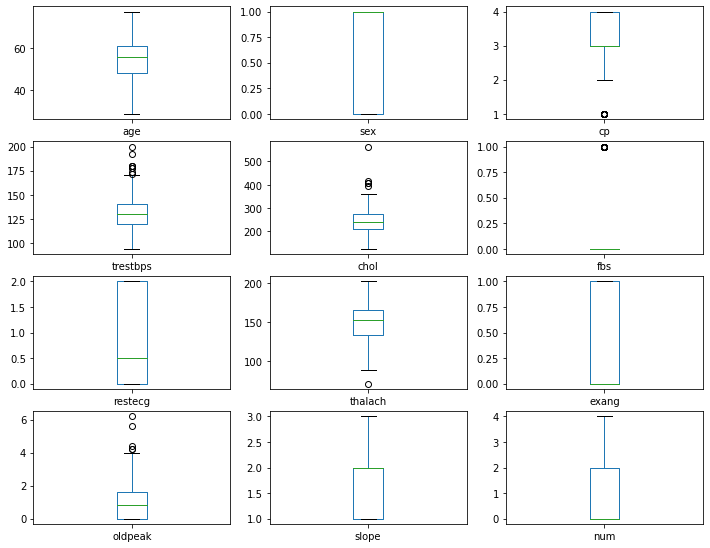

In [104]:
# w.r.t below observation we can say that we have out liers in trestbps,chol,oldpeak,cp,fbs
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))

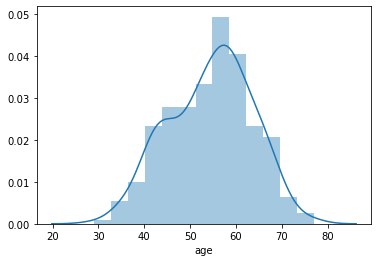

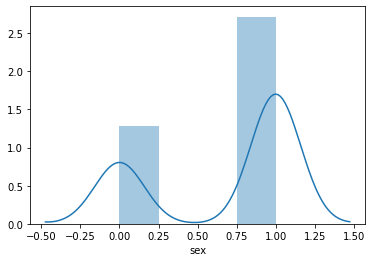

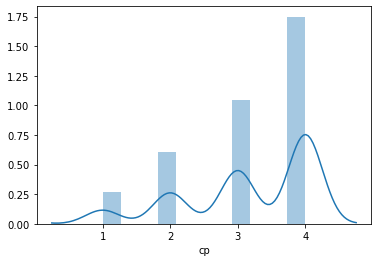

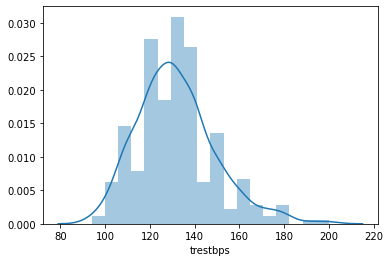

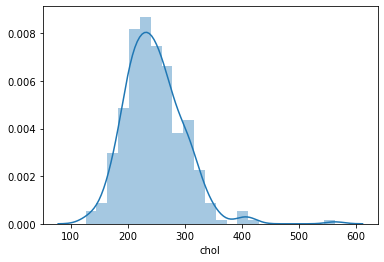

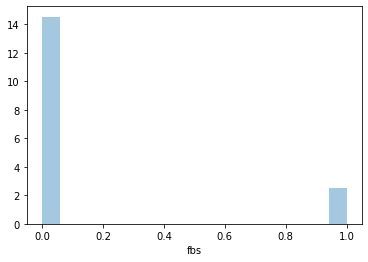

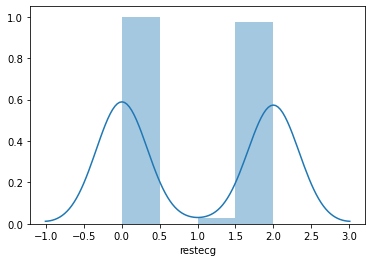

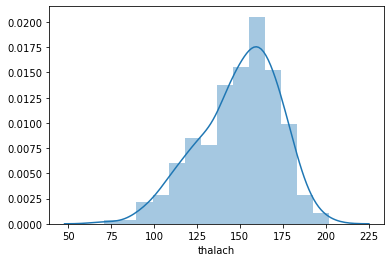

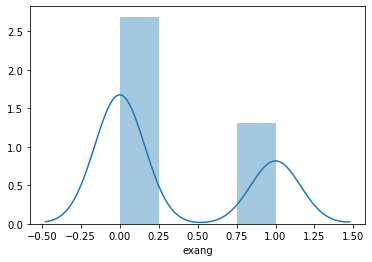

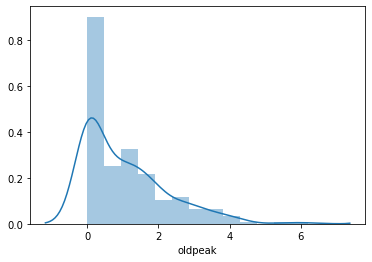

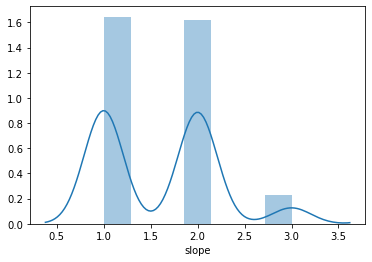

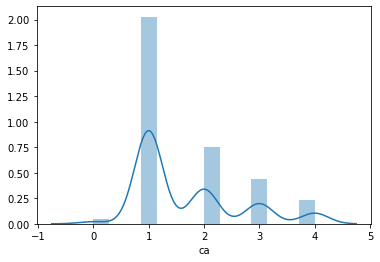

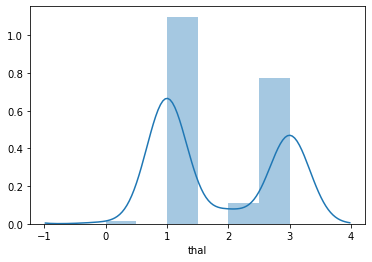

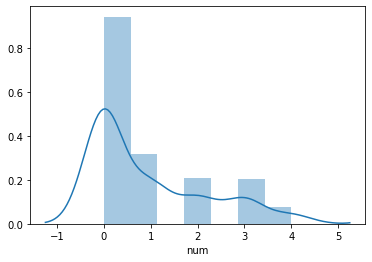

In [105]:
#from below observation we can say that data in the data set are not normally distributed
##as we can see cp,restecg,exang,slope,ca are skewed data
#And num,oldpeak are positively skewed and age, thalach are negatively skewed
for i in df1.describe().columns:
    sns.distplot(df1[i])
    plt.show()

# Bivariate analysis

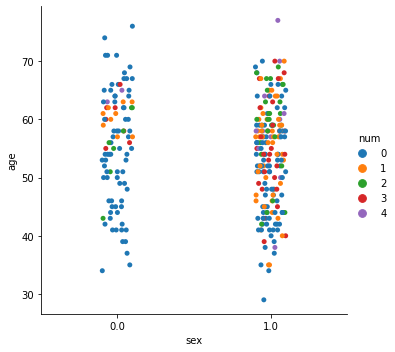

In [106]:
sns.catplot(x='sex',y='age',hue='num',data=df1)

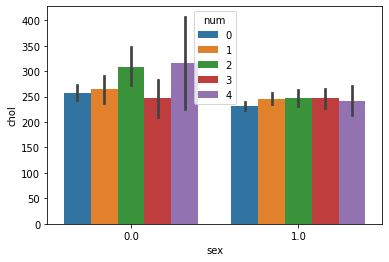

In [107]:
sns.barplot(x='sex',y='chol',hue='num',data=df1)

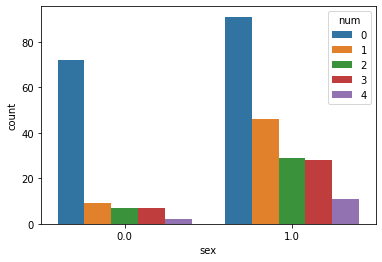

In [108]:
sns.countplot(x='sex',hue='num',data=df1)

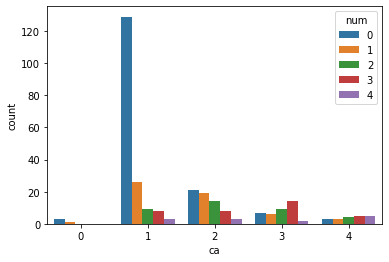

In [109]:
sns.countplot(x='ca',hue='num',data=df1)

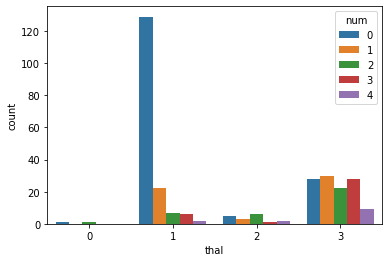

In [110]:
sns.countplot(x='thal',hue='num',data=df1)

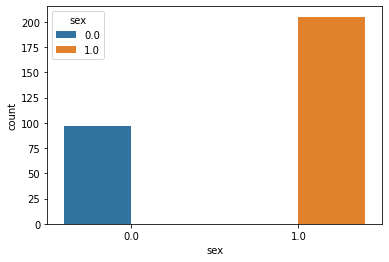

In [111]:
sns.countplot(x='sex',hue='sex',data=df1)

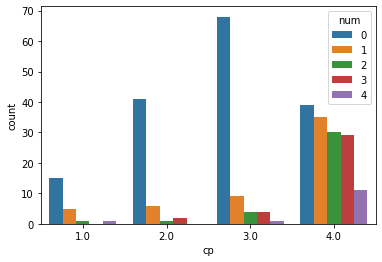

In [112]:
sns.countplot(x='cp',hue='num',data=df1)

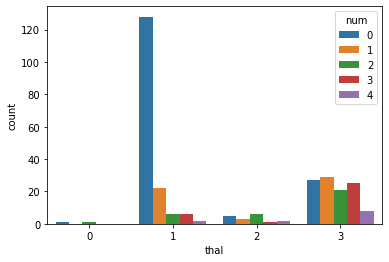

In [200]:
sns.countplot(x='thal',hue='num',data=df1)

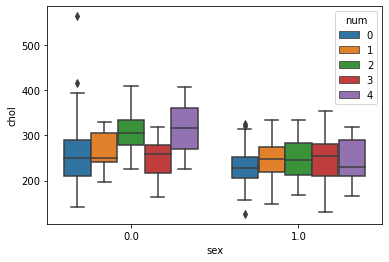

In [113]:
sns.boxplot(x='sex',y='chol', hue='num',data=df1)

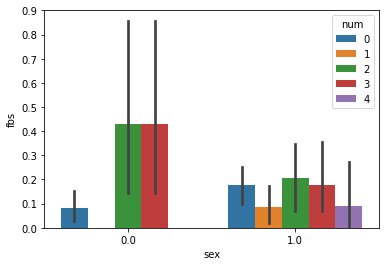

In [114]:
sns.barplot(x='sex',y='fbs', hue='num',data=df1)

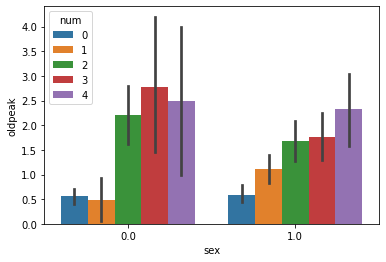

In [115]:
sns.barplot(x='sex',y='oldpeak', hue='num',data=df1)

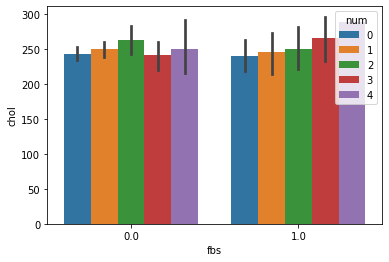

In [116]:
sns.barplot(x='fbs',y='chol', hue='num',data=df1)

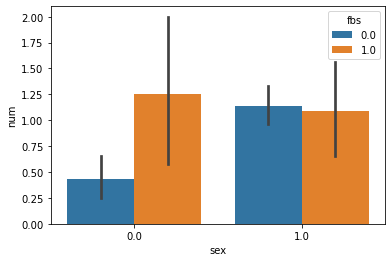

In [117]:
sns.barplot(x='sex',y='num', hue='fbs',data=df1)

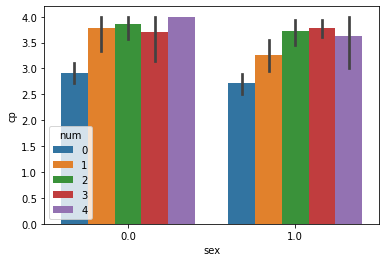

In [118]:
sns.barplot(x='sex',y='cp', hue='num',data=df1)

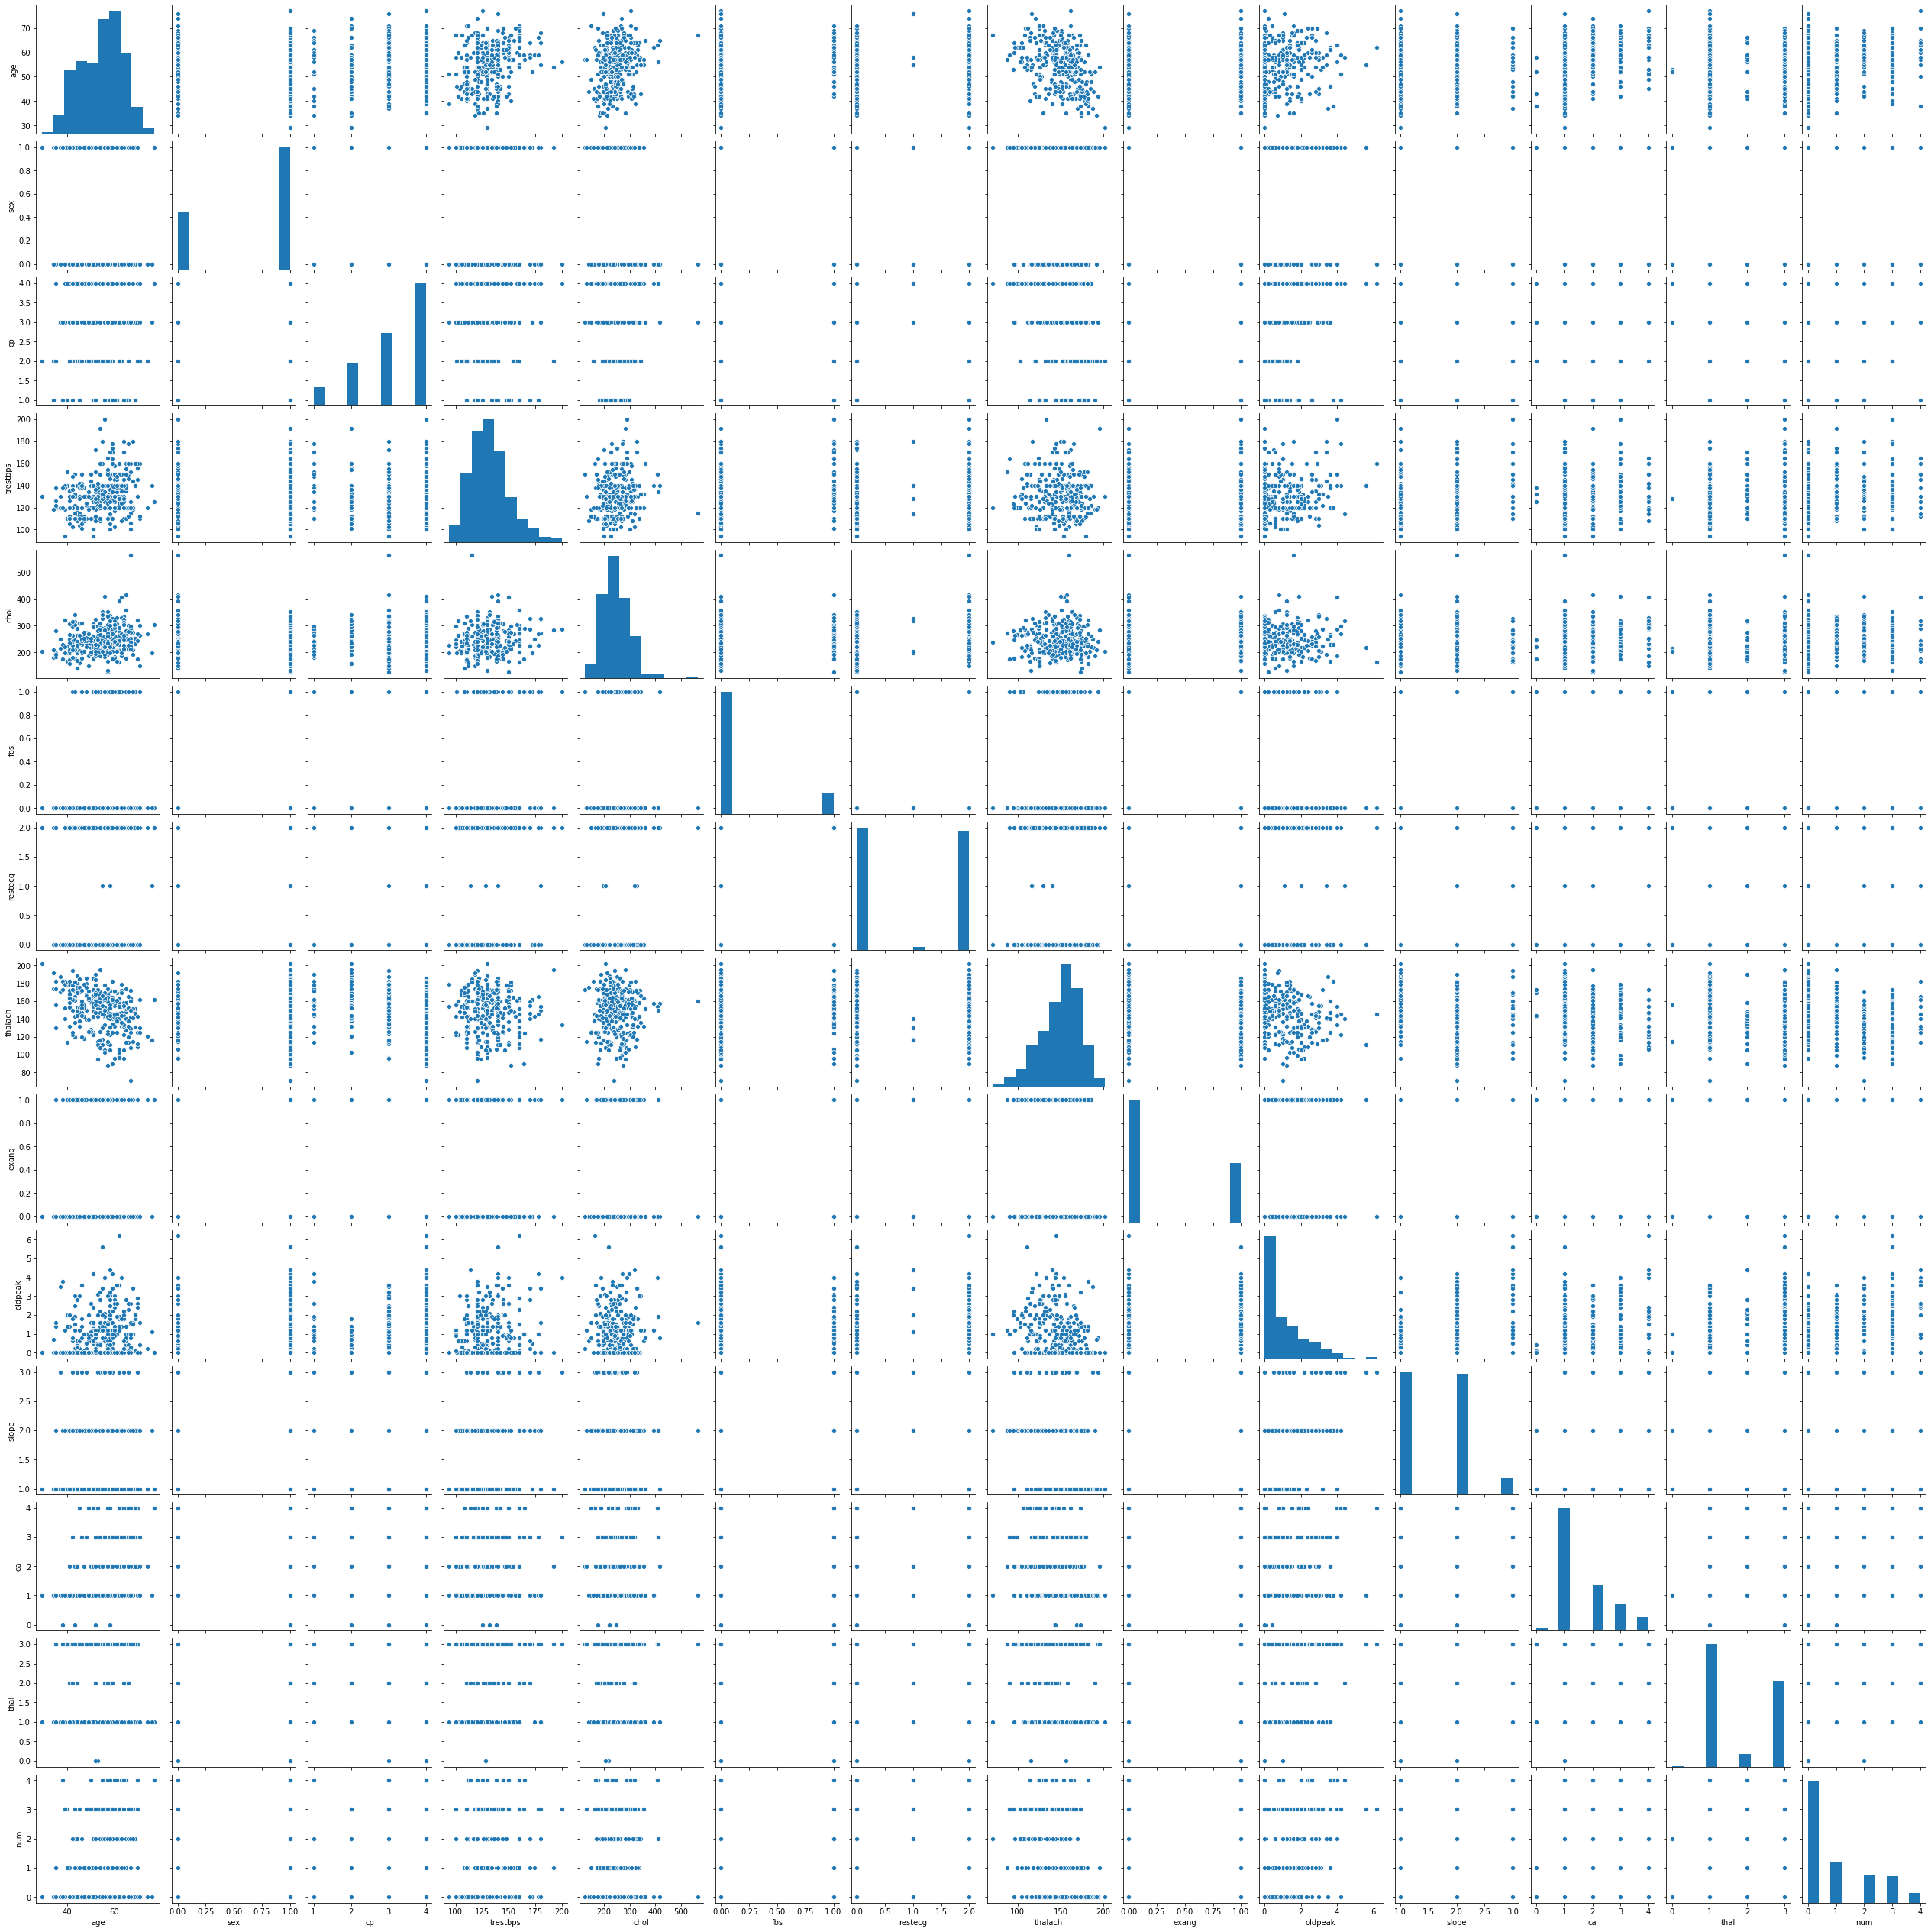

In [119]:
sns.pairplot(df1)

# Statistical Analysis

In [120]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,1.652318,1.824503,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.951469,0.967407,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,1.000000,1.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,3.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,3.000000,4.000000


<function matplotlib.pyplot.show(*args, **kw)>

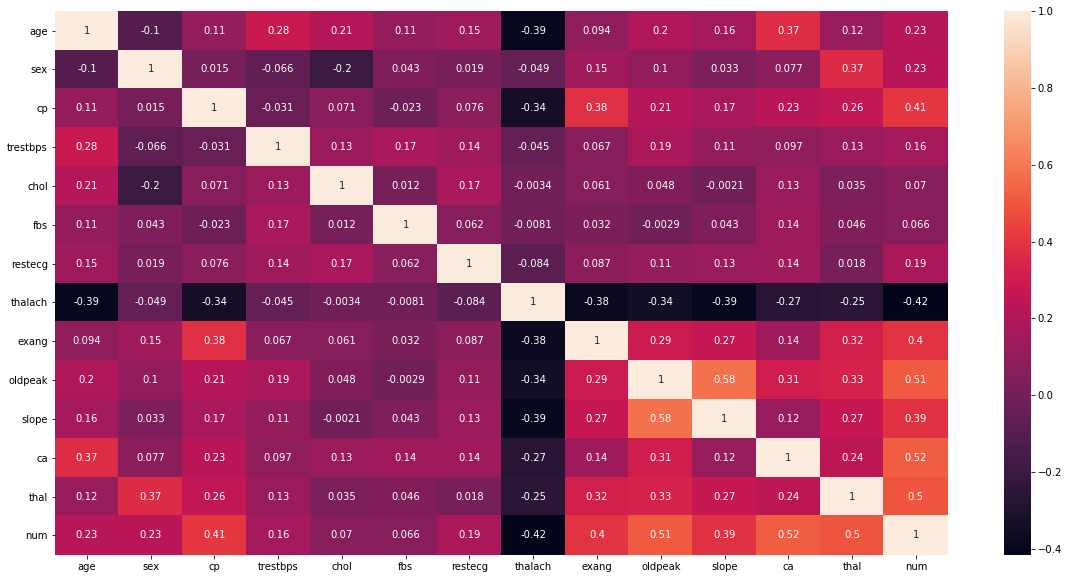

In [121]:
#Observing corelation between the columns through heatmap
#We observe positive correlation between num and thal,oldpeak,ca,cp
# and negative correlation between num and thalach
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.show

In [122]:
df1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.099925,0.112326,0.283257,0.210120,0.112245,0.146142,-0.394448,0.094065,0.201083,0.156199,0.372383,0.122231,0.225809
sex,-0.099925,1.000000,0.015342,-0.066292,-0.199492,0.042863,0.019386,-0.048740,0.148019,0.099976,0.032671,0.076707,0.366958,0.226601
cp,0.112326,0.015342,1.000000,-0.030717,0.070950,-0.022524,0.075854,-0.337136,0.382394,0.212589,0.171926,0.228424,0.258479,0.405182
trestbps,0.283257,-0.066292,-0.030717,1.000000,0.130924,0.171127,0.144395,-0.045437,0.066627,0.186987,0.112752,0.096510,0.126786,0.159978
chol,0.210120,-0.199492,0.070950,0.130924,1.000000,0.012058,0.172249,-0.003417,0.060755,0.047617,-0.002085,0.129317,0.035174,0.070315
fbs,0.112245,0.042863,-0.022524,0.171127,0.012058,1.000000,0.062202,-0.008067,0.031514,-0.002907,0.042630,0.141275,0.045887,0.065937
restecg,0.146142,0.019386,0.075854,0.144395,0.172249,0.062202,1.000000,-0.083591,0.087432,0.110879,0.127603,0.139011,0.018287,0.186769
thalach,-0.394448,-0.048740,-0.337136,-0.045437,-0.003417,-0.008067,-0.083591,1.000000,-0.378368,-0.343821,-0.389078,-0.265978,-0.251331,-0.415399
exang,0.094065,0.148019,0.382394,0.066627,0.060755,0.031514,0.087432,-0.378368,1.000000,0.291536,0.265491,0.144218,0.316794,0.395996
oldpeak,0.201083,0.099976,0.212589,0.186987,0.047617,-0.002907,0.110879,-0.343821,0.291536,1.000000,0.575415,0.310209,0.333968,0.508330


# Removing Outliers

In [123]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
df1=df1[(z<3).all(axis=1)]

# Splitting the data into input and target

In [124]:
x=df1.drop(['num'],axis=1)
y=df1['num']

In [125]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,4,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,3,3
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,1,1
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,1,1
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,1,1


In [126]:
y.head()

0    2
1    1
2    0
3    0
4    0
Name: num, dtype: int64

In [127]:
print(x.shape)
print(y.shape)

(293, 13)
(293,)


In [128]:
y=y.values.reshape(-1,1)

In [129]:
y.shape

(293, 1)

In [130]:
# Scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
df1[columns_to_scale]=scaler.fit_transform(df1[columns_to_scale])

In [131]:
#Minimizing skewness in data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [132]:
x.skew()

age        -0.173297
sex        -0.822922
cp         -0.829335
trestbps    0.532291
chol        0.257602
fbs         2.046054
restecg     0.061775
thalach    -0.479396
exang       0.738218
oldpeak     0.369165
slope       0.499063
ca          0.557688
thal        0.359326
dtype: float64

In [133]:
print(x.shape)
print(y.shape)

(293, 13)
(293, 1)


# Importing Necessary Libraries

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report

In [135]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=73,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(234, 13)
(234, 1)
(59, 13)
(59, 1)


# Using GridSearchCV to select best Parameter

In [191]:
knc=KNeighborsClassifier()
parameters={'n_neighbors':(1,3,5,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [196]:
svc=SVC()
parameters={'kernel':('linear', 'poly', 'rbf'),'C':[0.001,0.01,0.1,1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'linear'}

In [193]:
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [194]:
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [195]:
rbc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'max_features': 'sqrt', 'n_estimators': 50}

In [197]:
model=[]
score=[]
cvs=[]


for i in [KNeighborsClassifier(n_neighbors=10),SVC(C=1,kernel='linear'),
          DecisionTreeClassifier(criterion='entropy'),GradientBoostingClassifier(learning_rate=1,n_estimators=100),
          RandomForestClassifier(max_features='sqrt',n_estimators=50),MultinomialNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(x_train,y_train)
    k.score(x_train,y_train)
    predict=k.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    
    



The model score for KNeighborsClassifier(n_neighbors=10) are:
[2 0 3 0 1 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 2 0 0 0 0 0
 0 0 2 3 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1]
Accuracy score = 0.4067796610169492
The cv score is 0.5323202805376972

[[24  9  3  5  2]
 [ 5  0  1  2  1]
 [ 1  1  0  3  0]
 [ 0  1  1  0  0]
 [ 0  0  0  0  0]]

              precision    recall  f1-score   support

           0       0.80      0.56      0.66        43
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0

    accuracy                           0.41        59
   macro avg       0.16      0.11      0.13        59
weighted avg       0.58      0.41      0.48        59





The model score for SVC(C=1, kernel='linear') are:
[1 1 0 0 0 1 0 0 0 0 0 0 0 0 2 3 2 3 2 0 0 0 0 3 3 2 0 0 0 0 2 2 1 0 2 0 0
 0 0 0 2 0 0 2 0 0 0 0 0 4 2 0 0

In [198]:
result=pd.DataFrame({'Model':['KNeighborsClassifier','SVC','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','MultinomialNB'],'Accuracy_Score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_Score,Cross_val_score
0,KNeighborsClassifier,0.406780,0.532320
1,SVC,0.644068,0.593629
2,DecisionTreeClassifier,0.491525,0.478025
3,GradientBoostingClassifier,0.559322,0.508591
4,RandomForestClassifier,0.542373,0.597078
5,MultinomialNB,0.559322,0.528989


# w.r.t above table , we can finalise SVC as the best performing model

In [199]:
svc=SVC(C=1,kernel='linear')
svc.fit(x_train,y_train)
predict=svc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)

Accuracy Score = 0.6440677966101694
The CV Score = 0.5289888953828171


In [201]:
import joblib
joblib.dump(svc,"Heart-disease.pkl")

['Heart-disease.pkl']